# Introduction to Machine Learning

Author: Craig Wilcox

Link to GitHub repository: https://github.com/s256657/datafun-07-ml

Purpose: This project will introduce machine learning be working through simple linear regression which is a type os supervised learning. We will build a model, make predeictions, visualize the data, then publish insights. This should be used for introduction and learning.

In [1]:
# Import dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterlab
import pyarrow
import numpy as np
from scipy import stats

# Load Dataset
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [2]:
# Import scikit in separate cell in order to install sklearn items

%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

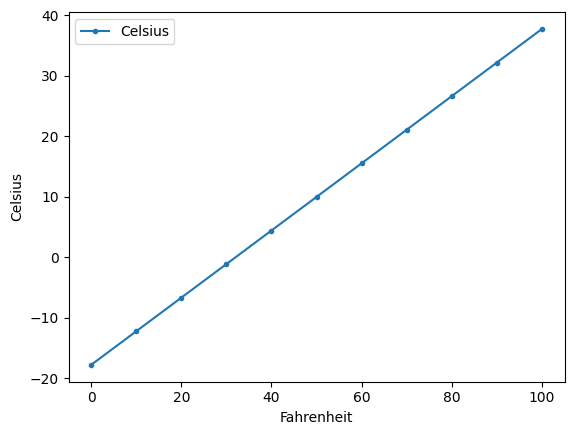

In [4]:
# Create a chart using a simple linear regression equation

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

This is a simple straight line chart showing the relationship between Fahrenheit and Celcius temperatures.

## Part 2 - Prediction

1. Data Aquired previously with dependencies
2. Data Inspection
3. Data Cleaning
4. Descriptive Statistics
5. Build Model
6. Predict
7. Visualizations

### Data Inspection

In [5]:

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
# Data inspection tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Clean Data

In [7]:

nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [8]:
nyc_df.Date.dtype

dtype('int64')

In [9]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [10]:
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Descriptive Statistics

In [11]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Build Model

In [12]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [13]:
linear_regression.slope

np.float64(0.014771361132966163)

In [14]:
linear_regression.intercept

np.float64(8.694993233674289)

In [15]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [16]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Predict
High temperature for 2024

In [17]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Visualization

(10.0, 70.0)

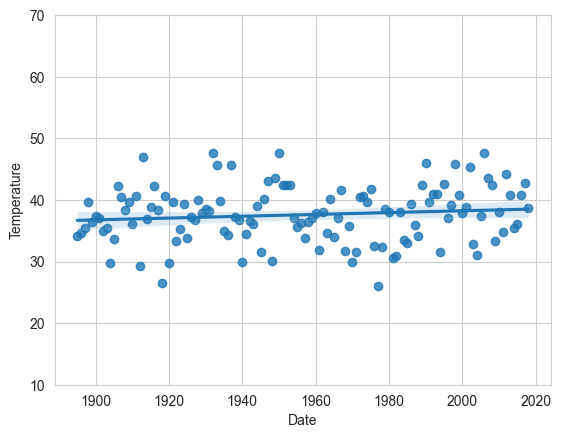

In [18]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Predictions using another method
1. Data aquired previously in dependencies
2. Data inspection - Previously completed in last prediction section
3. Data cleaning - Previously completed in last prediction section
4. Descriptive Statistics - Previously completed in last prediction section
5. Build Model
6. Test Model
7. Predict
8. Visualizations

### Build Model

In [19]:
# Split data for training and testing

X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

In [20]:
X_train.shape

(93, 1)

In [21]:
X_test.shape

(31, 1)

In [22]:
# Train Model

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [23]:
linear_regression.coef_

array([0.01939167])

In [24]:
linear_regression.intercept_

np.float64(-0.30779820252656265)

### Test Model

In [25]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Prediction for year 2024

In [26]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Visualization

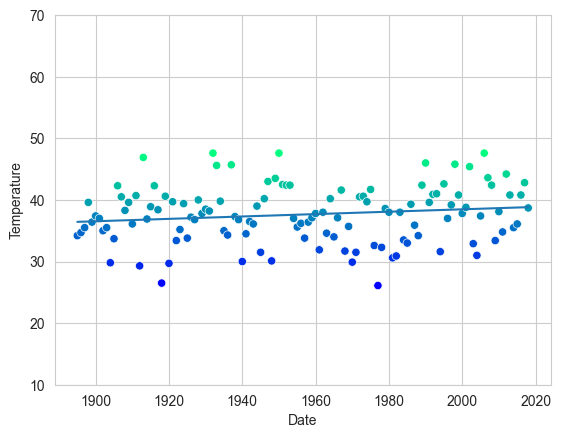

In [27]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

## Part 4 - Insights

Since this project was more based on the application of the predictions not the actual data I will not pull insights from predictions or the data specifically.

This project focuses on the same information and the same predictions but using two different approaches to making those predictions. In Step 2 this was what most are more familiar with as the calculations were manual in nature and works well when your trying to find out the answer to one problem. Step 3 with machine learning it allows a model to be built thus when you have multiple questions or want to input new data it is able to adapt to these.

While building these models it is important to consistently test and fix items as they come up. Most often the issue is not within the line of code where the error occurred. Machine Learning is so comprehensive that it pulls from every bit of code that was written previously and so it is very easy to create errors.

Since this is my first time comparing the two types of linear regression models I turned to Chatgpt to get some more insights on positives and negatives from the two different models below are some insights from Chatgpt.

Part 2 - scipy linear regression
Positives include simplicity, less overhead(smaller library), no need for data preprocessing, and direct outputs. Negatives include limited to simple linear regression, lack of cross-validation, and no built in tools for evaluation

Part 3 - scikit linear regression
Positives include flexibility, built in model evaluation, preprocessing and pipelines, scalability, and model management. Negatives include complexity, overhead when performing simple tasks, and dependencies required.

Those positives and negatives support my initial feelings when creating these models for practice in this project.